In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
data = pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## In-depth analysis of a Batsman

#### Creating a Dataframe of the batsman DA Warner. (You can take any batsman)

In [71]:
filt = data['batsman'] == 'DA Warner'
data_warner = data[filt]
data_warner.shape

(2902, 21)

#### Plotting a pie chart of how the batsman was dismissed.

<AxesSubplot:ylabel='dismissal_kind'>

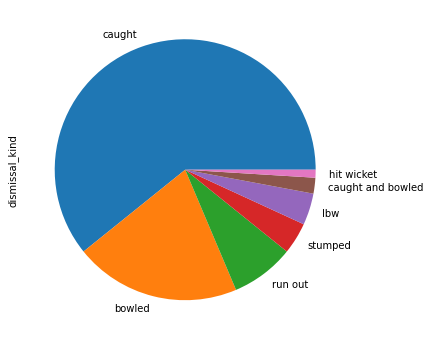

In [72]:
plt.figure(figsize=(12,6))
data_warner['dismissal_kind'].value_counts().plot.pie()

#### Analzying how many overall runs are scored by the batsman by hitting boundaries or by running singles.

In [73]:
data_warner['batsman_runs'].value_counts()

0    1124
1     997
4     401
2     207
6     160
3      13
Name: batsman_runs, dtype: int64

In [74]:
len(data_warner[data_warner['batsman_runs'] == 4])

401

In [75]:
len(data_warner[data_warner['batsman_runs'] == 6])

160

#### Creating a function that will tell how many total runs are scored by batsman by hitting 6, 4, 3, 2, 1. (If select 6 it will tell total runs scored only by hitting 6 and not other boundries or runs.)

In [76]:
def count(data,runs):
    return len(data_warner[data_warner['batsman_runs'] == runs])*runs

In [77]:
count(data_warner,1)

997

In [78]:
count(data_warner,4)

1604

In [79]:
count(data_warner,6)

960

In [80]:
count(data_warner,3)

39

In [81]:
count(data_warner,2)

414

#### Now we create a pie chart of the above data of runs

([<matplotlib.patches.Wedge at 0x295f7c80348>,
 [Text(0.8528338587348397, 0.8442004556948803, '1'),
  Text(-0.37046303659113355, 1.1413838699226815, '2'),
  Text(-0.7436684592650665, 0.9417840637292192, '3'),
  Text(-1.1128316125234867, -0.44900534759440974, '4'),
  Text(0.8769195434671883, -0.8191532910788422, '6')],
 [Text(0.4974864175953232, 0.49245026582201346, '24.8%'),
  Text(-0.21610343801149454, 0.6658072574548975, '10.3%'),
  Text(-0.43380660123795545, 0.5493740371753779, '1.0%'),
  Text(-0.6491517739720338, -0.261919786096739, '40.0%'),
  Text(0.5115364003558598, -0.47783941979599126, '23.9%')])

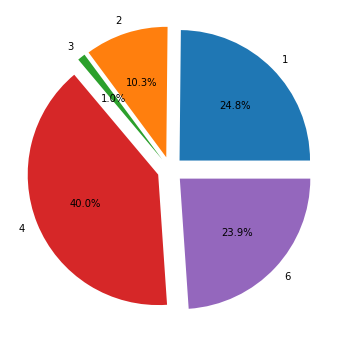

In [82]:
plt.figure(figsize=(12,6))
slices = [997,414,39,1604,960]
labels = [1,2,3,4,6]
#we will use explode to sepearate the pie chart for a better visualization
explode = [0.1,0.1,0.1,0.1,0.1]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)

## Score Distribution of each team

In [83]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [84]:
data['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

#### To create abbreviation of each team

In [85]:
# create a dictionary
Teams = {
    'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPSs'
}

In [86]:
Teams

{'Royal Challengers Bangalore': 'RCB',
 'Sunrisers Hyderabad': 'SRH',
 'Rising Pune Supergiant': 'RPS',
 'Mumbai Indians': 'MI',
 'Kolkata Knight Riders': 'KKR',
 'Gujarat Lions': 'GL',
 'Kings XI Punjab': 'KXIP',
 'Delhi Daredevils': 'DD',
 'Chennai Super Kings': 'CSK',
 'Rajasthan Royals': 'RR',
 'Deccan Chargers': 'DC',
 'Kochi Tuskers Kerala': 'KTK',
 'Pune Warriors': 'PW',
 'Rising Pune Supergiants': 'RPSs'}

In [87]:
data['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

#### We assign the abbriviation to the data by mapping the dict to the column of the whole data

In [88]:
data['batting_team'] = data['batting_team'].map(Teams)
data['bowling_team'] = data['bowling_team'].map(Teams)

#### Here we get the abbriviation of the teams in the data

In [89]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [90]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

#### To view the runs scored by each team from the match

In [91]:
data.groupby(['match_id','inning','batting_team'])['total_runs'].sum()

match_id  inning  batting_team
1         1       SRH             207
          2       RCB             172
2         1       MI              184
          2       RPS             187
3         1       GL              183
                                 ... 
634       2       KKR             140
635       1       GL              162
          2       SRH             163
636       1       SRH             208
          2       RCB             200
Name: total_runs, Length: 1284, dtype: int64

#### To convert it into a Dataframe

In [92]:
# We can use reset_index to convert it into DataFrame

data.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SRH,163
1282,636,1,SRH,208


In [93]:
# we dont want match_id now so we drop it and save in the DataFrame

runs = data.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()

In [94]:
runs.drop('match_id',axis=1, inplace=True)
runs.head()

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183


In [95]:
# To show the seperate innings in dataframe
innings1 = runs[runs['inning'] == 1]
innings2 = runs[runs['inning'] == 2]

In [96]:
innings1.head()

,inning,batting_team,total_runs
0,1,SRH,207
2,1,MI,184
4,1,GL,183
6,1,RPS,163
8,1,RCB,157


In [97]:
innings2.head()

,inning,batting_team,total_runs
1,2,RCB,172
3,2,RPS,187
5,2,KKR,184
7,2,KXIP,164
9,2,DD,142


<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

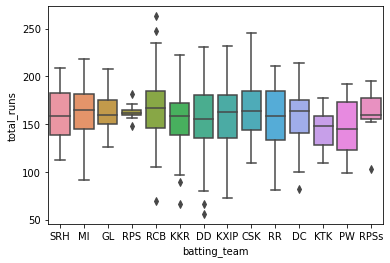

In [98]:
sns.boxplot(x='batting_team',y='total_runs', data=innings1)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

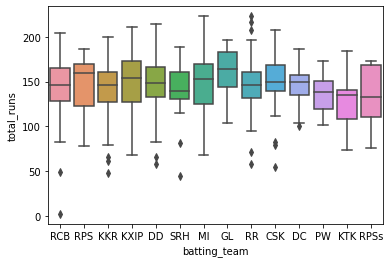

In [99]:
sns.boxplot(x='batting_team',y='total_runs', data=innings2)

#### Now we need to find how many teams scored runs above or equal to 200

In [100]:
data.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum()

match_id  inning  batting_team  bowling_team
1         1       SRH           RCB             207
          2       RCB           SRH             172
2         1       MI            RPS             184
          2       RPS           MI              187
3         1       GL            KKR             183
                                               ... 
634       2       KKR           SRH             140
635       1       GL            SRH             162
          2       SRH           GL              163
636       1       SRH           RCB             208
          2       RCB           SRH             200
Name: total_runs, Length: 1284, dtype: int64

#### To convert it into Dataframe

In [101]:
high_scores = data.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

In [102]:
high_scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SRH,140
1280,635,1,GL,SRH,162
1281,635,2,SRH,GL,163
1282,636,1,SRH,RCB,208


#### To print score above 200

In [103]:
high_scores[high_scores['total_runs'] >= 200]

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211
1282,636,1,SRH,RCB,208


In [104]:
score_200 = high_scores[high_scores['total_runs'] >= 200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211
1282,636,1,SRH,RCB,208


#### To visualize the data of the number of times the batting teams have scored above 200.

<AxesSubplot:xlabel='batting_team', ylabel='count'>

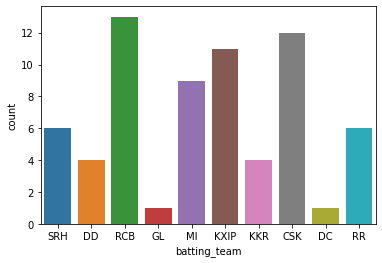

In [105]:
sns.countplot(x = score_200['batting_team'])

#### To visualize the data of the number of times the bowling teams have scored above 200.

<AxesSubplot:xlabel='bowling_team', ylabel='count'>

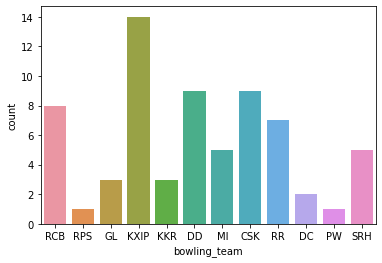

In [106]:
sns.countplot(x = score_200['bowling_team'])

### Here we are going to calculate how many bowls are played by each of the batsman

In [107]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [108]:
data.groupby('batsman')['ball'].count()

batsman
A Ashish Reddy     196
A Chandila           7
A Chopra            75
A Choudhary         20
A Flintoff          57
                  ... 
YV Takawale        183
Yashpal Singh       67
Younis Khan          7
Yuvraj Singh      2050
Z Khan             141
Name: ball, Length: 461, dtype: int64

#### We need the above result in DataFrame so we use reset_index() function to convert it into Dataframe.

In [109]:
data.groupby('batsman')['ball'].count().reset_index()

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


#### Saving the DataFrame in variable Balls

In [110]:
balls = data.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


#### Now we calculate the total number of runs scored by each batsman.

In [111]:
data.groupby('batsman')['batsman_runs'].sum()

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

In [112]:
runs = data.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


#### Now we create anaother dataframe where we calculate number of 4's hit by each of the batsman.

In [113]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


####  Batsman hitting how many 4's.

In [120]:
fours = data[data['batsman_runs'] == 4]
fours

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,RCB,SRH,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,RCB,SRH,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,RCB,SRH,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,RCB,SRH,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [128]:
runs_4 = fours.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns = ['batsman','4s']
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


#### Batsman hitting how many 6's.

In [132]:
data[data['batsman_runs'] == 6]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SRH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SRH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,RCB,SRH,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,RCB,SRH,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,RCB,SRH,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,RCB,SRH,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [135]:
sixs = data[data['batsman_runs'] == 6]
sixs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SRH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SRH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,RCB,SRH,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,RCB,SRH,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,RCB,SRH,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,RCB,SRH,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [140]:
runs_6 = sixs.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns = ['batsman','6s']
runs_6

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Mishra,5
4,A Mithun,1
...,...,...
296,Y Venugopal Rao,37
297,YK Pathan,149
298,YV Takawale,3
299,Yuvraj Singh,141


#### Now we create a new Dataframe in which the batsman details are given such as no. of runs, no. of 4's, etc.

In [142]:
player = pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis=1)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,NaN,NaN
457,Yashpal Singh,47,67,NaN,NaN
458,Younis Khan,3,7,NaN,NaN
459,Yuvraj Singh,2591,2050,NaN,NaN


#### To fill the NAN values.

In [143]:
player.fillna(0, inplace=True)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0
457,Yashpal Singh,47,67,0.0,0.0
458,Younis Khan,3,7,0.0,0.0
459,Yuvraj Singh,2591,2050,0.0,0.0


#### Here we Calculate the strikerate of each batsman.

In [148]:
player['strike_rate'] = (player['batsman_runs']/player['ball'])*100

In [150]:
player

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,5.0,125.000000
4,A Flintoff,62,57,3.0,1.0,108.771930
...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,104.918033
457,Yashpal Singh,47,67,0.0,0.0,70.149254
458,Younis Khan,3,7,0.0,0.0,42.857143
459,Yuvraj Singh,2591,2050,0.0,0.0,126.390244


#### Now we calculate maximum runs scored by each of the batsman.

In [160]:
grp = data.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
9510,636,SR Watson,RCB,11
9511,636,STR Binny,RCB,9
9512,636,Sachin Baby,RCB,18
9513,636,V Kohli,RCB,54


In [164]:
max_runs = grp.groupby('batsman')['batsman_runs'].max().reset_index()
max_runs.columns = ['batsman','max_runs']
max_runs

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


####  Now we concat the above 'max_runs' data with our 'player' data.

In [166]:
player2 = pd.concat([player,max_runs.iloc[:,1]],axis=1)
player2

,batsman,batsman_runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,36
1,A Chandila,4,7,7.0,1.0,57.142857,4
2,A Chopra,53,75,1.0,2.0,70.666667,24
3,A Choudhary,25,20,5.0,5.0,125.000000,15
4,A Flintoff,62,57,3.0,1.0,108.771930,24
...,...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,104.918033,45
457,Yashpal Singh,47,67,0.0,0.0,70.149254,20
458,Younis Khan,3,7,0.0,0.0,42.857143,3
459,Yuvraj Singh,2591,2050,0.0,0.0,126.390244,83


#### Now we calculate the Top 10 Batsman.

<AxesSubplot:xlabel='batsman'>

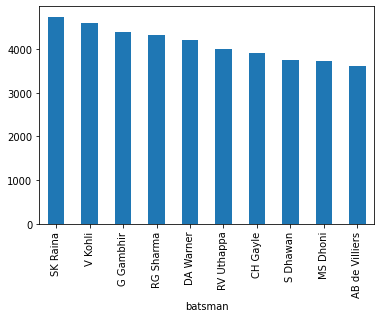

In [175]:
data.groupby('batsman')['total_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

#### Now we calculate Top 10 individaul score of batsman.

In [184]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [205]:
data.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by = 'batsman_runs', ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


#### Now we are going to find highest wicket taker.

In [206]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [207]:
data['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [209]:
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [212]:
hwt = data[data['dismissal_kind'].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


<AxesSubplot:>

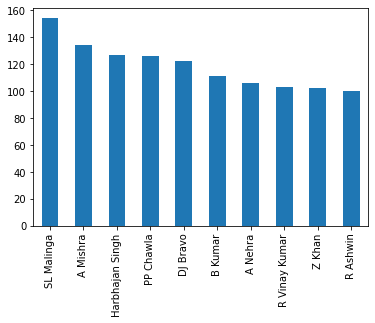

In [216]:
hwt['bowler'].value_counts().head(10).plot(kind='bar')